In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
df = pd.read_excel("UpdatedStudentSurvey.xlsx")
df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Future Planned,Career Option 1,Career Option 2,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Not yet,Nan,Nan,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Not yet,Nan,Nan,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Undecided,Nan,Nan,Nan,Nan,Nan,Nan,Detailed,Nan,Nan
4,Male,19,Chinese,Buddhist,Both Works,1,HDB,3.00,3.50,1,...,Undecided,Nan,Nan,Nan,Engineer,Nan,Nan,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Not yet,Nan,Nan,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness
197,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Undecided,Nan,Nan,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence
198,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
199,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Planned,Nurse,Journalist,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills


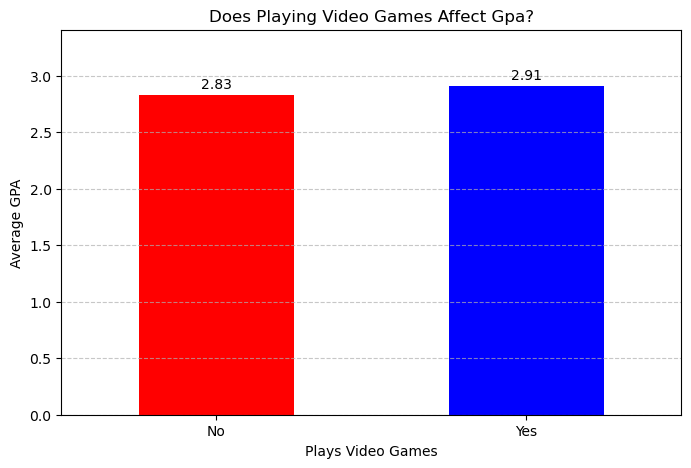

In [43]:
# Group data by Video Games and calculate average GPA for each group
average_gpa = df.groupby('Video Games')['Current GPA'].mean()

# bar chart to compare average GPA
plt.figure(figsize=(8, 5))
bars = average_gpa.plot(kind='bar', color=['red', 'blue'])
plt.title('Does Playing Video Games Affect Gpa?')
plt.xlabel('Plays Video Games')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.ylim(0, average_gpa.max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#labels
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')
plt.show()


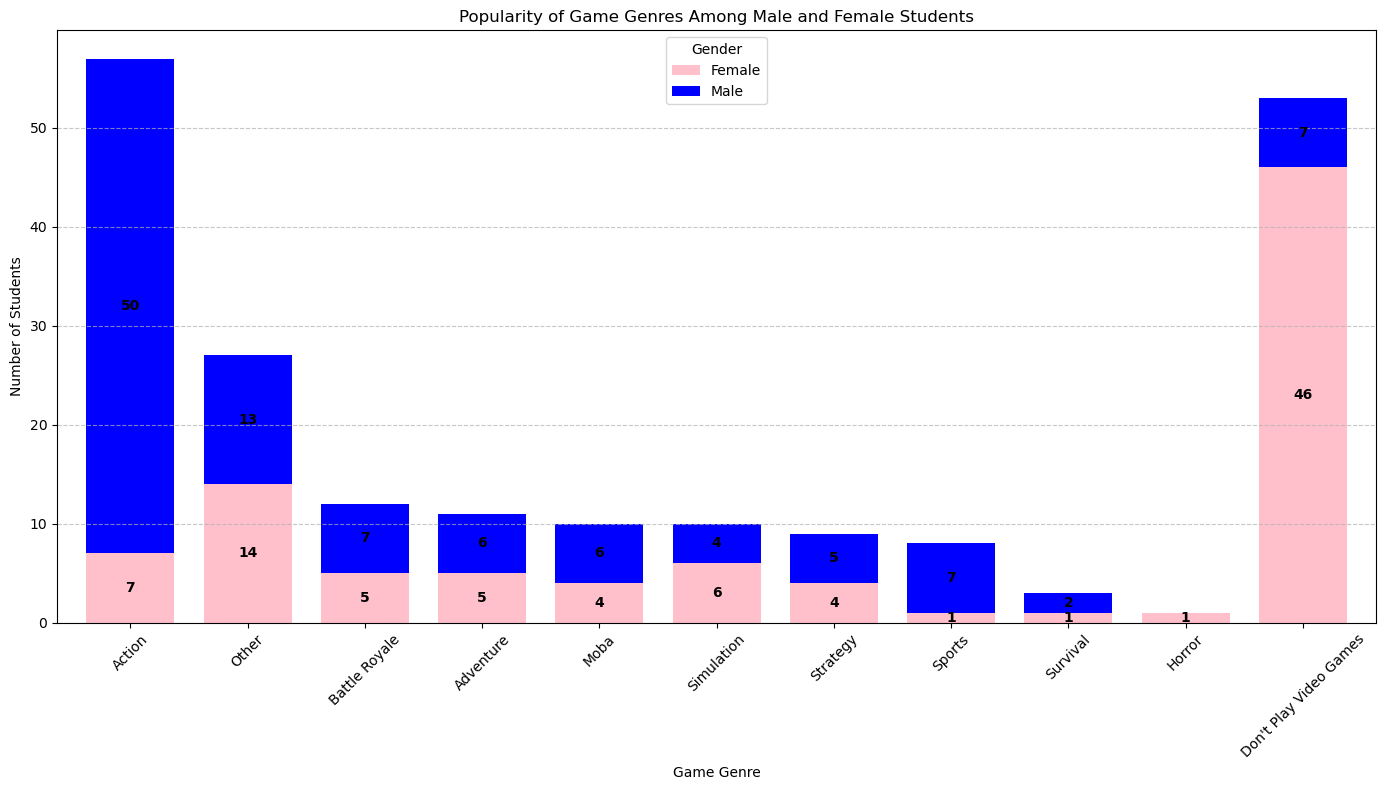

In [44]:
# Group data by 'Game Genre' and 'Gender'
genre_by_gender = df.groupby(['Game Genre', 'Gender']).size().unstack(fill_value=0)

# Total count column for sorting
genre_by_gender['Total'] = genre_by_gender.sum(axis=1)

# Sort genres by total count but keep 'Don't Play Video Games' at back
if 'Don\'t Play Video Games' in genre_by_gender.index:
    # Remove 'Don't Play Video Games' from sorted genres temporarily
    temp_genre = genre_by_gender.drop('Don\'t Play Video Games')
    # Sort remaining genres
    temp_genre = temp_genre.sort_values(by='Total', ascending=False)
    # Append 'Don't Play Video Games' to the end
    ordered_genres = pd.concat([temp_genre, genre_by_gender.loc[['Don\'t Play Video Games']]])

# Drop the total column as its no longer needed
ordered_genres = ordered_genres.drop(columns=['Total'])

fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar chart
bars = ordered_genres.plot(kind='bar', stacked=True, color=['pink', 'blue'], width=0.75, ax=ax)
plt.title('Popularity of Game Genres Among Male and Female Students')
plt.xlabel('Game Genre')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#label
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        plt.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     ha='center', va='center', color='black', size=10, weight='bold')

plt.tight_layout()  # Adjust layout to fit everything cleanly
plt.show()


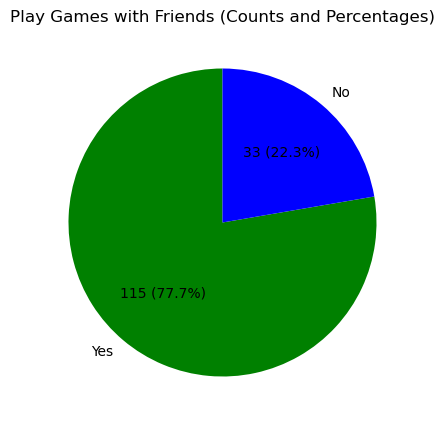

In [45]:
# Function to calculate percentage and display it with the count
play_counts_refined = df['Game With Friends'].replace('Don\'t Play Video Games', None).dropna().value_counts()
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct, v=val)
    return my_autopct

# Replotting the data with count and percentage
plt.figure(figsize=(5, 5))
plt.pie(play_counts_refined, labels=play_counts_refined.index, autopct=autopct_format(play_counts_refined.values), startangle=90, colors=['green', 'blue', 'gray'])
plt.title('Play Games with Friends (Counts and Percentages)')
plt.show()

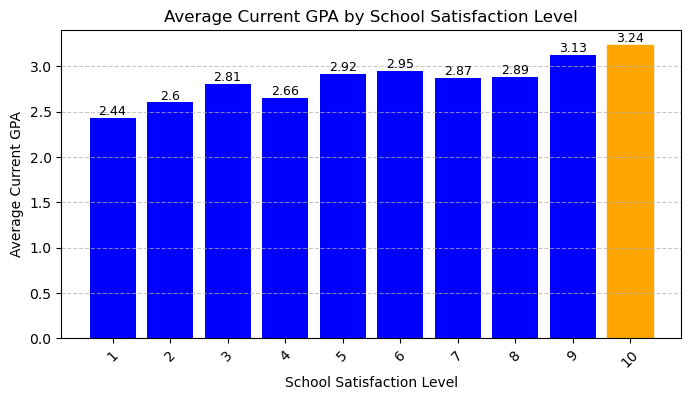

In [32]:
grouped_data = df.groupby('School Satisfaction Level')['Current GPA'].mean()

#Bar Graph
plt.figure(figsize=(8, 4))
bars = plt.bar(grouped_data.index, grouped_data.values, color='blue')

# Highlight highest gpa
max_gpa = grouped_data.max()
for bar in bars:
    if bar.get_height() == max_gpa:
        bar.set_color('orange')

#label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.title('Average Current GPA by School Satisfaction Level')
plt.xlabel('School Satisfaction Level')
plt.ylabel('Average Current GPA')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 11))
plt.show()

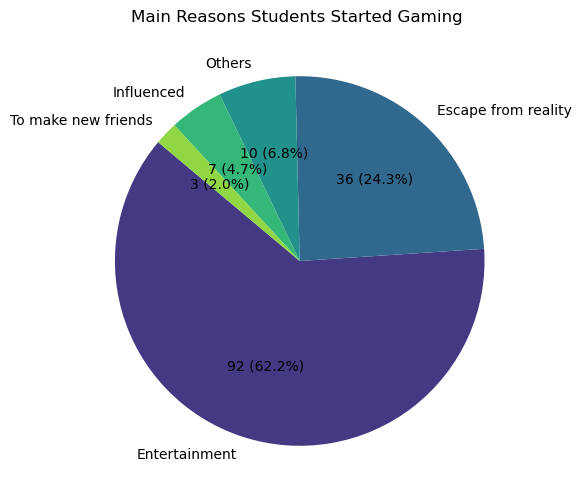

In [33]:
# Refine the 'Main Reason Started Gaming' column based on specific reasons, excluding those who don't play
specific_reasons = ['Entertainment', "Don't Play Video Games", 'Escape from reality', 'Influenced', 'To make new friends']
main_reasons_refined = df['Main Reason Started Gaming'].apply(lambda x: x if x in specific_reasons else 'Others')

# Exclude "Don't Play Video Games" from the reasons
main_reasons_refined_excluded = main_reasons_refined[main_reasons_refined != "Don't Play Video Games"]

# Count the occurrences of each category excluding non-players
refined_reason_counts_excluded = main_reasons_refined_excluded.value_counts()

# Plotting the pie chart with count and percentage
plt.figure(figsize=(6, 6))
plt.pie(refined_reason_counts_excluded, labels=refined_reason_counts_excluded.index, autopct=autopct_format(refined_reason_counts_excluded.values), startangle=140, colors=sns.color_palette('viridis', len(refined_reason_counts_excluded)))
plt.title('Main Reasons Students Started Gaming ')
plt.show()


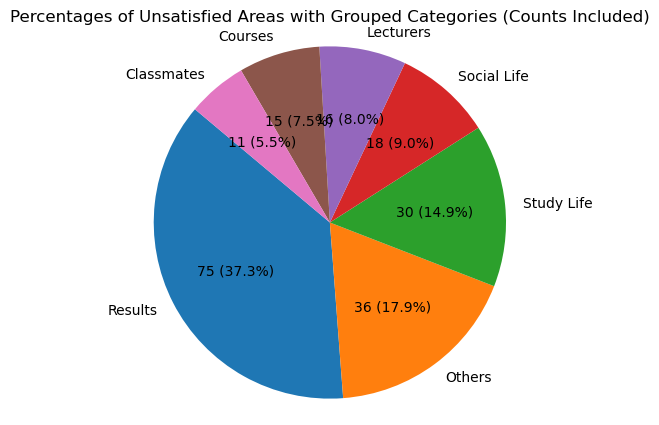

In [34]:
# Define the main categories including 'None' to make sure it's handled correctly
main_categories = ['Results', 'Study Life', 'None', 'Social Life', 'Lecturers', 'Classmates', 'Courses']

# Replace all categories not in the main list with 'Others'
df['Unsatisfied Area Modified'] = df['Unsatisfied Area'].apply(lambda x: x if x in main_categories else 'Others')

# Recalculate the value counts for the modified column
modified_unsatisfied_counts = df['Unsatisfied Area Modified'].value_counts()

# Plotting the pie chart with count and percentage
plt.figure(figsize=(5, 5))
plt.pie(modified_unsatisfied_counts, labels=modified_unsatisfied_counts.index, autopct=autopct_format(modified_unsatisfied_counts.values), startangle=140)
plt.title('Percentages of Unsatisfied Areas with Grouped Categories (Counts Included)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


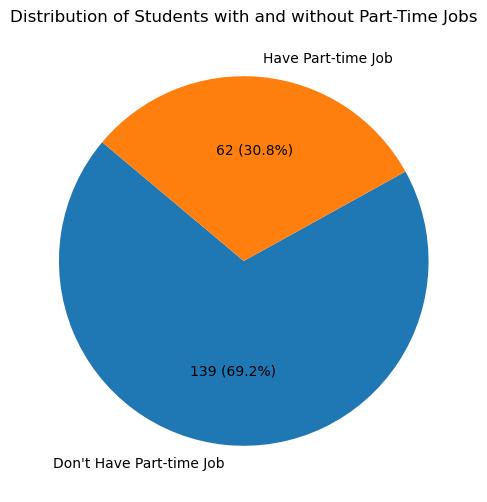

In [35]:
# Count the occurrences of part-time job statuses
part_time_counts = df['Part-Time'].value_counts()

# Replace index names as per user request
part_time_counts.index = ['Have Part-time Job' if x == 'Yes' else "Don't Have Part-time Job" for x in part_time_counts.index]

# Modify the autopct to include both percentage and absolute value
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct, v=val)
    return my_autopct

# Generate the pie chart with updated labels
plt.figure(figsize=(8, 6))
plt.pie(part_time_counts, labels=part_time_counts.index, autopct=autopct_format(part_time_counts),
        startangle=140)
plt.title('Distribution of Students with and without Part-Time Jobs')
plt.show()

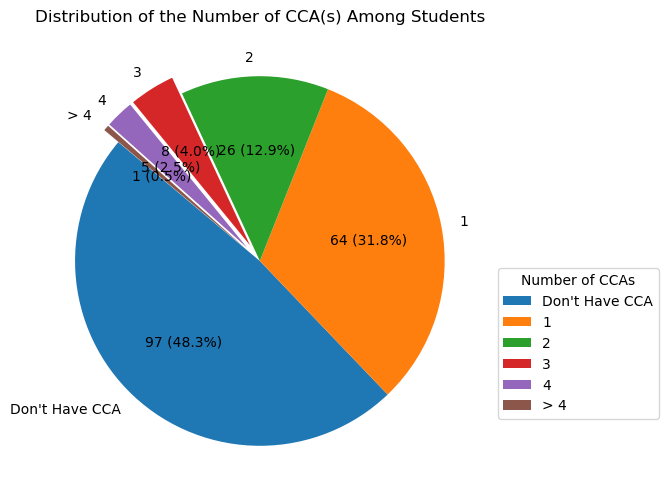

In [40]:
# Define the autopct_format function to include both count and percentage
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct, v=val)
    return my_autopct

# Redrawing the pie chart with both count and percentage shown
plt.figure(figsize=(8, 6))
plt.pie(cca_counts, labels=cca_counts.index, autopct=autopct_format(cca_counts),
        startangle=140, explode=explode_values)
plt.title('Distribution of the Number of CCA(s) Among Students')
plt.legend(title='Number of CCAs', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()